In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys
sys.path.append("../")

from machinelearning_batch import main, plot_net_predictions, validate_predictions
from src.utils import get_experimental_data, plot_experiment

FILENAME = "../data/data_processed.xlsx"
EXPERIMENT = "BR01"

Dataset shape: (8, 8)


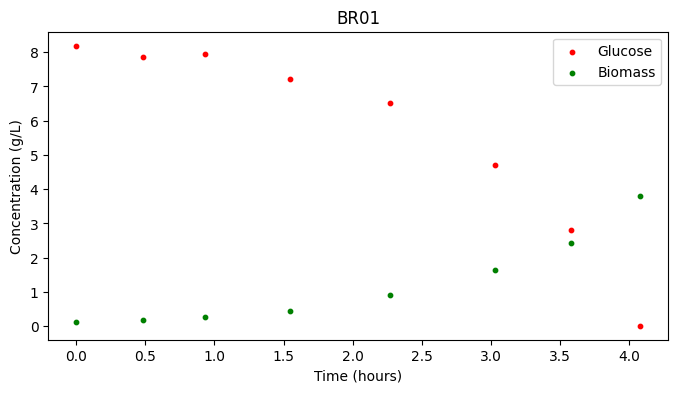

In [12]:
data = get_experimental_data(file_name=FILENAME, keep_only='B')

full_df = data.loc[EXPERIMENT]
print(f"Dataset shape: {full_df.shape}")

plot_experiment(full_df, title=EXPERIMENT)

Training with 2 samples
Epoch 0, Loss 66.8788
mu_max: 0.4999, K_s: 0.5001, Y_xs: 0.5001


Epoch 5000, Loss 0.0016
mu_max: 0.5505, K_s: 0.5373, Y_xs: 0.1758
Early stopping at epoch 6130
mu_max = 0.5527
Ks = 0.5369
Yxs = 0.1726


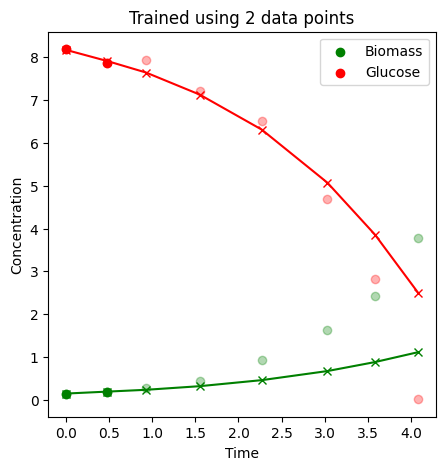

************************************************************************
************************************************************************
Biomass error: 0.03502373831503425
Glucose error: 0.2950267219543461
Real Biomass: 0.2672839506172422 || Predicted Biomass: 0.23226021230220795
Real Glucose: 7.94 || Predicted Glucose: 7.644973278045654
Biomass MSE: 1.3384672071680808
Glucose MSE: 0.9445043691775119
Training with 3 samples
Epoch 0, Loss 63.9585
mu_max: 0.4999, K_s: 0.5001, Y_xs: 0.5001
Early stopping at epoch 4370
mu_max = 0.4591
Ks = 0.5379
Yxs = 0.2843


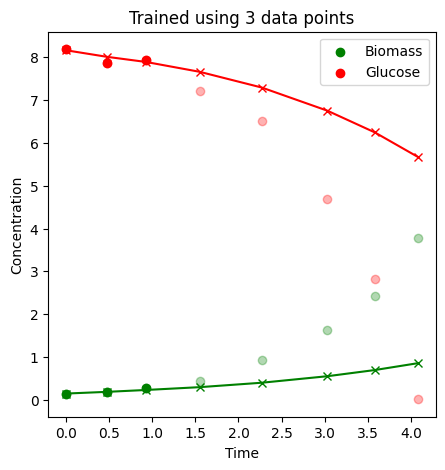

************************************************************************
************************************************************************
Biomass error: 0.1546660845545264
Glucose error: 0.44256809234619165
Real Biomass: 0.44844444444451054 || Predicted Biomass: 0.29377835988998413
Real Glucose: 7.22 || Predicted Glucose: 7.662568092346191
Biomass MSE: 1.6331696395390916
Glucose MSE: 6.101457455855847
Training with 4 samples
Epoch 0, Loss 64.4796
mu_max: 0.4999, K_s: 0.5001, Y_xs: 0.5001
Early stopping at epoch 4579
mu_max = 0.6398
Ks = 0.5531
Yxs = 0.2635


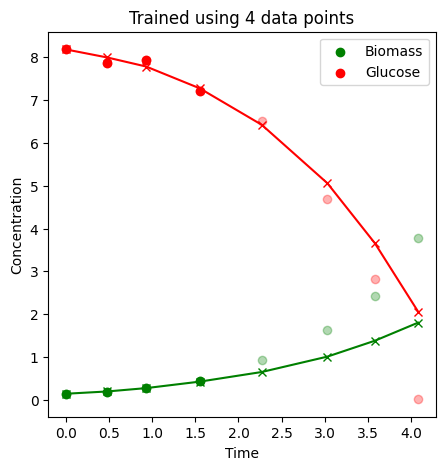

************************************************************************
************************************************************************
Biomass error: 0.2693691934683885
Glucose error: 0.08616710662841776
Real Biomass: 0.9175641025641527 || Predicted Biomass: 0.6481949090957642
Real Glucose: 6.51 || Predicted Glucose: 6.423832893371582
Biomass MSE: 0.6881947666348244
Glucose MSE: 0.6350975990313142
Training with 5 samples
Epoch 0, Loss 60.8882
mu_max: 0.5001, K_s: 0.4999, Y_xs: 0.4999
Early stopping at epoch 4217
mu_max = 0.6522
Ks = 0.4137
Yxs = 0.3361


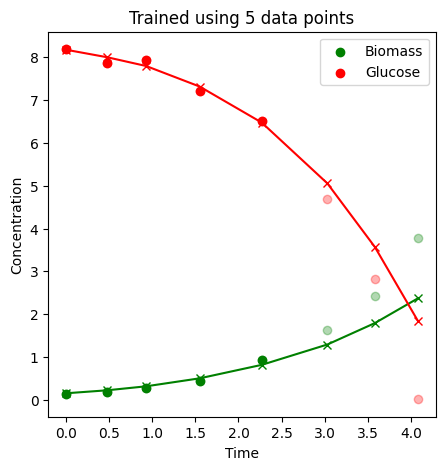

************************************************************************
************************************************************************
Biomass error: 0.3436077749161328
Glucose error: 0.354885387420655
Real Biomass: 1.6340476190476025 || Predicted Biomass: 1.2904398441314697
Real Glucose: 4.699999999999999 || Predicted Glucose: 5.054885387420654
Biomass MSE: 0.31779164686350503
Glucose MSE: 0.5079628514134293
Training with 6 samples
Epoch 0, Loss 61.4924
mu_max: 0.4999, K_s: 0.5001, Y_xs: 0.5001
Epoch 5000, Loss 0.0072
mu_max: 0.7578, K_s: 0.3251, Y_xs: 0.3911
Early stopping at epoch 5162
mu_max = 0.7340
Ks = 0.3386
Yxs = 0.3809


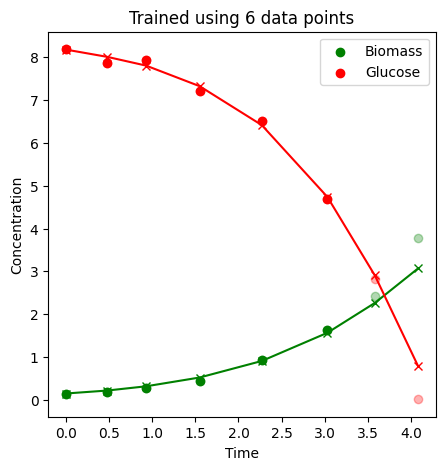

************************************************************************
************************************************************************
Biomass error: 0.160652051289917
Glucose error: 0.08374016761779801
Real Biomass: 2.422833333333374 || Predicted Biomass: 2.262181282043457
Real Glucose: 2.82 || Predicted Glucose: 2.903740167617798
Biomass MSE: 0.06984604353247063
Glucose MSE: 0.08359710981747938
Training with 7 samples
Epoch 0, Loss 56.1602
mu_max: 0.5001, K_s: 0.4999, Y_xs: 0.4999
Epoch 5000, Loss 0.0070
mu_max: 0.7380, K_s: 0.2735, Y_xs: 0.3920
Early stopping at epoch 6280
mu_max = 0.7468
Ks = 0.2660
Yxs = 0.3961


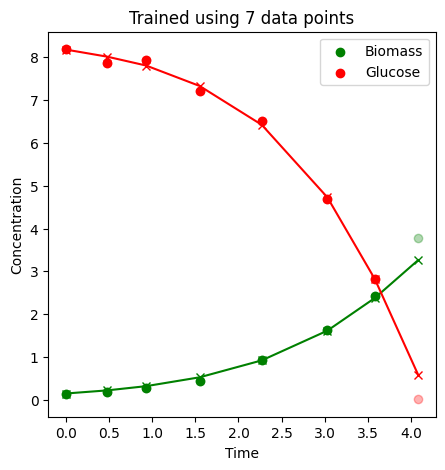

************************************************************************
************************************************************************
Biomass error: 0.5278729324340734
Glucose error: 0.5765629653930664
Real Biomass: 3.7879999999999914 || Predicted Biomass: 3.260127067565918
Real Glucose: 0.012 || Predicted Glucose: 0.5885629653930664
Biomass MSE: 0.03648469960609826
Glucose MSE: 0.04895399626061452
Training with 8 samples
Epoch 0, Loss 52.6920
mu_max: 0.4999, K_s: 0.5001, Y_xs: 0.5001
Epoch 5000, Loss 0.1055
mu_max: 0.7246, K_s: 0.1573, Y_xs: 0.4072
Early stopping at epoch 5035
mu_max = 0.7267
Ks = 0.1634
Yxs = 0.3983


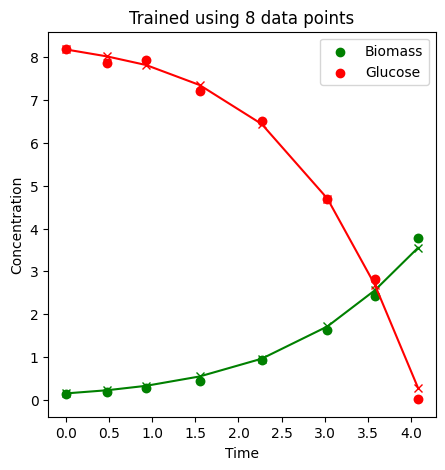

************************************************************************
************************************************************************
Biomass MSE: 0.012222994277351247
Glucose MSE: 0.018417595259403036


In [15]:
for i in range(2, len(full_df)+1):

    print(f"Training with {i} samples")
    
    train_df = full_df.iloc[:i]
    net, u_pred, loss = main(train_df, full_df, num_epochs=30000, verbose=5000)
    
    print(f'mu_max = {net.mu_max.item():.4f}')
    print(f'Ks = {net.K_s.item():.4f}')
    print(f'Yxs = {net.Y_xs.item():.4f}')    
    
    # title = f"mu_max = {net.mu_max.item():.4f}, Ks = {net.K_s.item():.4f}, Yxs = {net.Y_xs.item():.4f} | Loss = {loss:.4f}"
    title = f'Trained using {i} data points'
    plot_net_predictions(full_df=full_df, train_df=train_df, u_pred=u_pred, title=title)
    
    validate_predictions(full_df=full_df, u_pred=u_pred, i=i)